In [1]:
#Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import requests
import gmaps
import os

In [3]:
#data files
ca_largest_fires = 'Resources/top_20_CA_wildfires.csv'

# read CA fire perimeters 
ca_largest_fires = pd.read_csv(ca_largest_fires)

#create DataFrame
top_20_fires_df = pd.DataFrame(ca_largest_fires)
top_20_fires_df.head()

,fire_name,cause,month,year,county,acres,structures,deaths
0,Mendocino Complex,Under Investigation,July,2018,"Colusa County, Lake County, Mendocino County &...",459123,280,1
1,Thomas,Powerlines,December,2017,Ventura & Santa Barbara,281893,1063,2
2,Cedar,Human Related,October,2003,San Diego,273246,2820,15
3,Rush,Lightning,August,2012,Lassen,271911,0,0
4,Rim,Human Related,August,2013,Tuolumne,257314,112,0


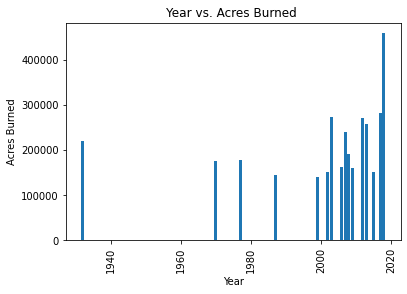

In [4]:
x_axis = top_20_fires_df['year']
y_axis = top_20_fires_df['acres']

# making a scatter plot
plt.bar(x_axis, y_axis, width=0.90)
plt.xticks(rotation=90)


# giving the name to the x and y label
plt.title('Year vs. Acres Burned ')
plt.xlabel('Year')
plt.ylabel('Acres Burned')
plt.savefig('years_vs_acresburned_all.png')

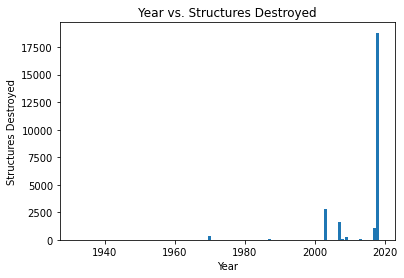

In [5]:
x_axis = top_20_fires_df['year']
y_axis = top_20_fires_df['structures']

# making a scatter plot
plt.bar(x_axis, y_axis,  width=0.90)


# giving the name to the x and y label
plt.title('Year vs. Structures Destroyed')
plt.xlabel('Year')
plt.ylabel('Structures Destroyed')
plt.savefig('years_vs_structures_destroyed_all.png')

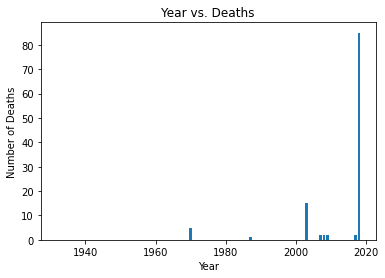

In [6]:
x_axis = top_20_fires_df['year']
y_axis = top_20_fires_df['deaths']

# making a scatter plot
plt.bar(x_axis, y_axis)


# giving the name to the x and y label
plt.title('Year vs. Deaths')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.savefig('years_vs_deaths_all.png')

In [7]:
past_30_years = top_20_fires_df.loc[top_20_fires_df['year'] >= 1990]
past_30_years

,fire_name,cause,month,year,county,acres,structures,deaths
0,Mendocino Complex,Under Investigation,July,2018,"Colusa County, Lake County, Mendocino County &...",459123,280,1
1,Thomas,Powerlines,December,2017,Ventura & Santa Barbara,281893,1063,2
2,Cedar,Human Related,October,2003,San Diego,273246,2820,15
3,Rush,Lightning,August,2012,Lassen,271911,0,0
4,Rim,Human Related,August,2013,Tuolumne,257314,112,0
5,Zaca,Human Related,July,2007,Santa Barbara,240207,1,0
6,Carr,Human Related,July,2018,"Shasta County,Trinity County",229651,1614,8
8,Witch,Powerlines,October,2007,San Diego,197990,1650,2
9,Klamath Theater Complex,Lightning,June,2008,Siskiyou,192038,0,2
12,Basin Complex,Lightning,June,2008,Monterey,162818,58,0


In [21]:
#export new dataframe to csv
past_30_years.to_csv('past_30_years.csv')

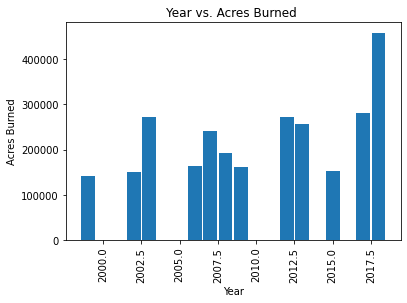

In [8]:
x_axis = past_30_years['year']
y_axis = past_30_years['acres']

# making a scatter plot
plt.bar(x_axis, y_axis, width=0.90)
plt.xticks(rotation=90)


# giving the name to the x and y label
plt.title('Year vs. Acres Burned ')
plt.xlabel('Year')
plt.ylabel('Acres Burned')
plt.savefig('years_vs_acres_30yrs.png')

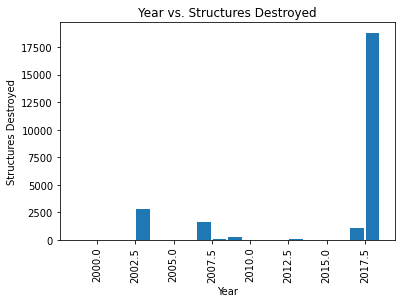

In [9]:
x_axis = past_30_years['year']
y_axis = past_30_years['structures']

# making a scatter plot
plt.bar(x_axis, y_axis,  width=0.90)
plt.xticks(rotation=90)

# giving the name to the x and y label
plt.title('Year vs. Structures Destroyed')
plt.xlabel('Year')
plt.ylabel('Structures Destroyed')
plt.savefig('years_vs_structures_30yrs.png')

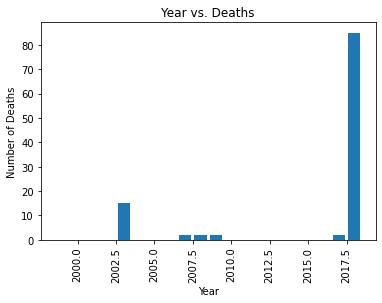

In [10]:
x_axis = past_30_years['year']
y_axis = past_30_years['deaths']

# making a scatter plot
plt.bar(x_axis, y_axis)
plt.xticks(rotation=90)

# giving the name to the x and y label
plt.title('Year vs. Deaths')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.savefig('years_vs_deaths_30yrs.png')

The r-value is -0.17


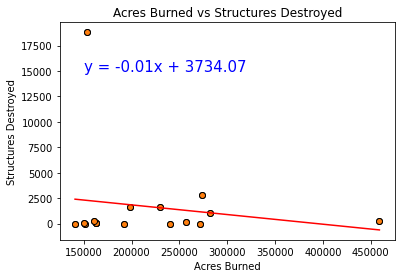

<Figure size 432x288 with 0 Axes>

In [18]:
x_axis = past_30_years['acres']
y_axis = past_30_years['structures']

plt.scatter(x_axis, y_axis, edgecolors='black')

plt.title('Acres Burned vs Structures Destroyed')
plt.xlabel('Acres Burned')
plt.ylabel('Structures Destroyed')

correlation = st.pearsonr(x_axis, y_axis)
correlation
print(f"The r-value is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(150000,15000),fontsize=15,color="blue")
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.plot(x_axis,regress_values,"r-")
plt.show()
plt.savefig('acres_vs_structures_30yrs.png')

The r-value is -0.17


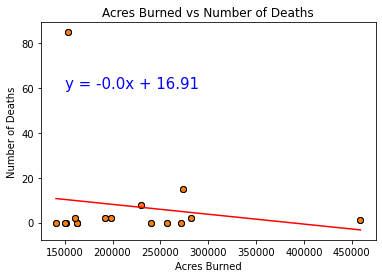

<Figure size 432x288 with 0 Axes>

In [19]:
x_axis = past_30_years['acres']
y_axis = past_30_years['deaths']

plt.scatter(x_axis, y_axis, edgecolors='black')

plt.title('Acres Burned vs Number of Deaths')
plt.xlabel('Acres Burned')
plt.ylabel('Number of Deaths')

deaths_correlation = st.pearsonr(x_axis, y_axis)
deaths_correlation
print(f"The r-value is {round(deaths_correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(150000,60),fontsize=15,color="blue")
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.plot(x_axis,regress_values,"r-")
plt.show()
plt.savefig('acres_vs_deaths_30yrs.png')

The r-value is 1.0


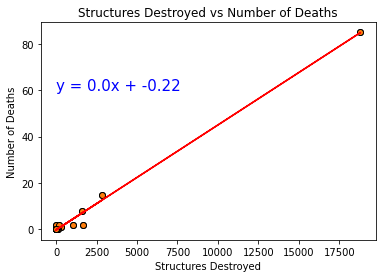

<Figure size 432x288 with 0 Axes>

In [20]:
x_axis = past_30_years['structures']
y_axis = past_30_years['deaths']

plt.scatter(x_axis, y_axis, edgecolors='black')

plt.title('Structures Destroyed vs Number of Deaths')
plt.xlabel('Structures Destroyed')
plt.ylabel('Number of Deaths')

str_correlation = st.pearsonr(x_axis, y_axis)
str_correlation
print(f"The r-value is {round(str_correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(0,60),fontsize=15,color="blue")
plt.scatter(x_axis, y_axis, edgecolors='black')
plt.plot(x_axis,regress_values,"r-")
plt.show()
plt.savefig('structure_vs_deaths_30yrs.png')

In [29]:
#pull value counts for cause of fire
past_30_years['cause'].value_counts()

Human Related          7
Lightning              5
Powerlines             3
Under Investigation    1
Name: cause, dtype: int64

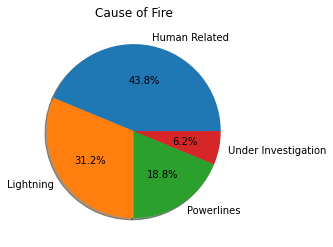

<Figure size 432x288 with 0 Axes>

In [38]:
human_related = past_30_years.loc[past_30_years['cause'] == 'Human Related'].count()[0]
lightning = past_30_years.loc[past_30_years['cause'] == 'Lightning'].count()[0]
powerlines = past_30_years.loc[past_30_years['cause'] == 'Powerlines'].count()[0]
under_investigation = past_30_years.loc[past_30_years['cause'] == 'Under Investigation'].count()[0]

labels = ['Human Related', 'Lightning', 'Powerlines', 'Under Investigation']

plt.title('Cause of Fire')
plt.pie([human_related, lightning, powerlines, under_investigation], labels=labels, autopct="%1.1f%%", shadow=True)
plt.show()
plt.savefig('cause_of_fire_pie.png')